<h1 style="text-align: center;">Desafío - Clasificación desde la econometría</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Clasificación desde la econometría`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78288/activities/119116/items/610922">plataforma</a>.

## Descripción
En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:
- `sbp`: Presión Sanguínea Sistólica.
- `tobacco`: Promedio tabaco consumido por día.
- `ldl`: Lipoproteína de baja densidad.
- `adiposity`: Adiposidad.
- `famhist`: Antecedentes familiares de enfermedades cardiácas. (Binaria)
- `types`: Personalidad tipo A
- `obesity`: Obesidad.
- `alcohol`: Consumo actual de alcohol.
- `age`: edad.
- `chd`: Enfermedad coronaria. (dummy). **Vector objetivo**.

### Desafío 1: Preparar el ambiente de trabajo
- Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).
- Importe el archivo `southafricanheart.csv` que se encuentra dentro del material de apoyo.

In [29]:
# Utiliza esta celda para importar los módulos solicitados y el set de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

plt.style.use("seaborn")

df = pd.read_csv("southafricanheart.csv").drop(columns = ["Unnamed: 0"])
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


- Realice una descripción del set importado mostrando la lista con los nombres de variables importadas

In [30]:
# Utiliza esta celda para mostrar los nombres de las columnas del dataframe
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

- Muestre un análisis descriptivo mediante .describe()

In [31]:
# Utiliza esta celda para aplicar describe()
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


**Comentarios de las variables continuas**
Sus masgnitudes son variadas. Chd no se debe considerar como una variable continua, ya que corresponde a nuestro vector objetivo que es categórico.

- Muestre distribución de categorías para las variables `famhist` y `chd`.

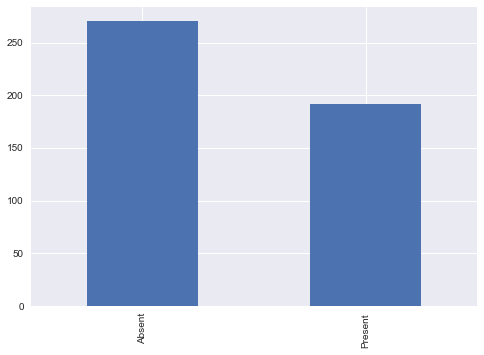

In [32]:
# Utiliza esta celda para mostrar las frecuencias de famhist con un gráfico de barras
df["famhist"].value_counts().plot(kind="bar");

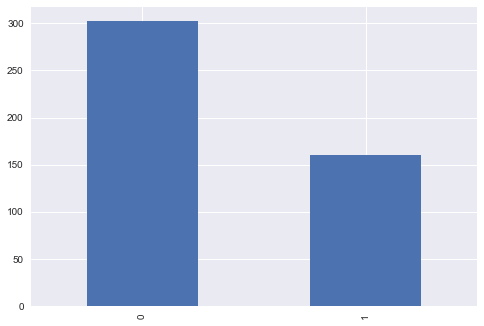

In [33]:
# Utiliza esta celda para mostrar las frecuencias de chd con un gráfico de barras
df["chd"].value_counts().plot(kind="bar");

**Comentarios de las variables categóricas**
Una mayor cantidad de personas no tiene antecedentes familiares ni presenta enfermedad coronaria

## Desafío 2

A continuación se presenta el siguiente modelo a estimar:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \beta_{famhist} \cdot \text{famhist}_i
$$

Para ello ejecute los siguientes pasos:
1. Recodifique `famhist` a dummy, asignando 1 a la categoría minoritaria.

In [34]:
# Utiliza esta celda para realizar la codificación solicitada
df["famhist"] = df["famhist"].replace(["Absent", "Present"], [0, 1])
df["famhist"].value_counts()

0    270
1    192
Name: famhist, dtype: int64

2. Utilice `smf.logit` para estimar el modelo.

In [35]:
# Utiliza esta celda para instanciar y entrenar el modelo solicitado
modelo_1 = smf.logit("chd ~ famhist", df).fit()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


In [36]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Sun, 04 Sep 2022   Pseudo R-squ.:                 0.05740
Time:                        20:44:28   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist        1.1690      0.203      5.751      0.000       0.771       1.567
==============================================================================
"""

3. Implemente una función `inverse_logit` que realice el mapeo de log-odds a probabilidad.

In [37]:
# Utiliza esta celda para implementar la función solicitada
def inverse_logit(x):
    # Retorna una probabilidad
    return 1 / (1 + np.exp(-x))

4.  Con el modelo estimado, responda lo siguiente:
- ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

In [38]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=1.
log_odds_1 = modelo_1.params["Intercept"] + modelo_1.params["famhist"] * 1


# Obtener además la probabilidad utilizando inverse_logit
probabilidad_con_antecedentes = inverse_logit(log_odds_1)

print(f"La probabilidad de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de {round(probabilidad_con_antecedentes, 2)}")

La probabilidad de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de 0.5


¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener
una enfermedad coronaria?

In [39]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=0.
log_odds_2 = modelo_1.params["Intercept"] + modelo_1.params["famhist"] * 0

# Obtener además la probabilidad utilizando inverse_logit
probabilidad_sin_antecedentes = inverse_logit(log_odds_2)

print(f"La probabilidad de tener una enfermedad coronaria cuando no se tiene antecedentes familiares es de {round(probabilidad_sin_antecedentes, 2)}")

La probabilidad de tener una enfermedad coronaria cuando no se tiene antecedentes familiares es de 0.24


- ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

In [40]:
# Utiliza esta celda para mostrar las diferencias de ambas probabilidades
print(
    f"Un individuo con antecedentes familiares tiene {round(probabilidad_con_antecedentes - probabilidad_sin_antecedentes, 2)} mas" 
    " probabilidad de tener una enfermedad coronaria"
)

Un individuo con antecedentes familiares tiene 0.26 mas probabilidad de tener una enfermedad coronaria


- Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados. _Tip: Utilice $\beta$/4_

In [41]:
# Utiliza esta celda para entrenar el modelo ols y mostrar los coeficientes
modelo_2 = smf.ols("chd ~ famhist", df).fit()
modelo_2.params

Intercept    0.237037
famhist      0.262963
dtype: float64

In [42]:
modelo_1.params["famhist"] / 4

0.2922482713574773

**Respuesta**

El valor obtenido al dividir el coeficiente estimado con logit por 4 es similar al valor del coeficiente obtenido con mínimos cuadrados

### Desafío 3: Estimación completa

Implemente un modelo con la siguiente forma:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \sum_{j=1}^{n}\beta_j \cdot X_{ji}
$$

In [43]:
# Utiliza esta celda para entrenar el modelo solicitado
model_3 = smf.logit("chd ~ sbp + tobacco + ldl + adiposity + famhist+ obesity + alcohol + age + typea", df).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Sun, 04 Sep 2022   Pseudo R-squ.:                  0.2080
Time:                        20:44:28   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp            0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco        0.0794      0.027      2.984      0.003       0.027       0.132
ldl            0.1739      0.060      2.915      0.004       0.057       0.291
adiposity      0.0186      0.029      0.635      0.526      -0.039       0.076
famhist        0.9254      0.228      4.061      0.000       0.479       1.372
obesity       -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol        0.0001      0.004      0.027      0.978      -0.009       0.009
age            0.0452      0.012      3.728      0.000       0.021       0.069
typea          0.0396      0.012      3.214      0.001       0.015       0.064
==============================================================================
"""

- Depure el modelo manteniendo las variables con significancia estadística al 5%.

In [44]:
# Utiliza esta celda para mostrar los coeficientes con significancia estadística al 5%
coefs = model_3.summary2().tables[1]

coefs[coefs["P>|z|"] < 0.05]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.150721,1.308260,-4.701451,0.000003,-8.714863,-3.586578
tobacco,0.079376,0.026603,2.983758,0.002847,0.027236,0.131517
ldl,0.173924,0.059662,2.915166,0.003555,0.056989,0.290859
famhist,0.925370,0.227894,4.060530,0.000049,0.478706,1.372034
age,0.045225,0.012130,3.728464,0.000193,0.021451,0.068999
typea,0.039595,0.012320,3.213823,0.001310,0.015448,0.063742


In [45]:
# Utiliza esta celda para entrenar el modelo depurado
model_4 = smf.logit("chd ~ tobacco + ldl + famhist + age + typea", df).fit()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


- Compare los estadísticos de bondad de ajuste entre ambos.

In [46]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del primer modelo
print(f"La log verosimilitud del modelo saturado es de {model_3.llf}")

La log verosimilitud del modelo saturado es de -236.07001618624895


In [47]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del segundo modelo
print(f"La log verosimilitud del modelo saturado es de {model_4.llf}")

La log verosimilitud del modelo saturado es de -237.8427890168743


**Respuesta**

La log verosimilitud es levemente mejor (mayor) en el modelo saturado.

- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria

In [48]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan positivamente
coefs_dep = model_4.summary2().tables[1]

coefs_dep[coefs_dep["Coef."] > 0] 

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
tobacco,0.080375,0.025880,3.105731,1.898095e-03,0.029652,0.131099
ldl,0.161992,0.054969,2.946967,3.209075e-03,0.054255,0.269729
famhist,0.908175,0.225758,4.022774,5.751661e-05,0.465697,1.350654
age,0.050460,0.010206,4.944159,7.647332e-07,0.030457,0.070464
typea,0.037115,0.012167,3.050542,2.284291e-03,0.013269,0.060962


In [49]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan negativamente
coefs_dep = model_4.summary2().tables[1]

coefs_dep[coefs_dep["Coef."] < 0] 

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.446445,0.920872,-7.000372,2.552836e-12,-8.25132,-4.641569


**Respuesta**
- Los factores de riesgo de tener una enfermedad coronaria son el hecho de fumar, tener un valor de ldl alto, tener antecedentes familiares, tener personalidad tipo a, y tener mayor edad.
- Entre los regresores explorados no hay factores protectores.

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con `inverse_logit`. Los perfiles a estimar son los
siguientes:

- La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

In [50]:
#tobacco + ldl + famhist + age + typea

In [51]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares
log_odds_promedio = model_4.params["Intercept"] + model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].mean() + \
model_4.params["famhist"] + model_4.params["age"] * df["age"].mean() + model_4.params["typea"] * df["typea"].mean()

prob_promedio_con_ant = inverse_logit(log_odds_promedio)
prob_promedio_con_ant

0.41418659081821735

In [52]:
# Utiliza esta celda para mostrar la probabilidad de un individuo promedio sin antecedentes familiares
log_odds_promedio_sin_ant = model_4.params["Intercept"] + model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].mean() + \
model_4.params["age"] * df["age"].mean() + model_4.params["typea"] * df["typea"].mean()

prob_promedio_sin_ant = inverse_logit(log_odds_promedio_sin_ant)
prob_promedio_sin_ant

0.22185998096946388

- La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

In [53]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares y un alto nivel de lopoproteína de baja densidad
log_odds_promedio_alto_ldl = model_4.params["Intercept"] + model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].max() + \
model_4.params["famhist"] + model_4.params["age"] * df["age"].mean() + model_4.params["typea"] * df["typea"].mean()

prob_promedio_con_ant_alto_ldl = inverse_logit(log_odds_promedio_alto_ldl)
prob_promedio_con_ant_alto_ldl

0.7971787814732932

In [54]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio sin antecedentes familiares y un alto nivel de lopoproteína de baja densidad
log_odds_promedio_alto_ldl_sin_ant = model_4.params["Intercept"] + model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].max() + \
model_4.params["age"] * df["age"].mean() + model_4.params["typea"] * df["typea"].mean()

prob_promedio_sin_ant_alto_ldl = inverse_logit(log_odds_promedio_alto_ldl_sin_ant)
prob_promedio_sin_ant_alto_ldl

0.613151477648457

- La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

In [55]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares y un bajo nivel de lopoproteína de baja densidad
log_odds_promedio_bajo_ldl = model_4.params["Intercept"] + model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].min() + \
model_4.params["famhist"] + model_4.params["age"] * df["age"].mean() + model_4.params["typea"] * df["typea"].mean()

prob_promedio_con_ant_bajo_ldl = inverse_logit(log_odds_promedio_bajo_ldl)
prob_promedio_con_ant_bajo_ldl

0.2777146981541852

In [56]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio sin antecedentes familiares y un bajo nivel de lopoproteína de baja densidad
log_odds_promedio_bajo_ldl_sin_ant = model_4.params["Intercept"] + model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].min() + \
model_4.params["age"] * df["age"].mean() + model_4.params["typea"] * df["typea"].mean()

prob_promedio_sin_ant_bajo_ldl = inverse_logit(log_odds_promedio_bajo_ldl_sin_ant)
prob_promedio_sin_ant_bajo_ldl

0.13423736552881